# BadBuyAnalysis
AIM: Generare le distribuzioni dei badbuy in funzione dei valori categorici e confrontare tra loro le distribuzioni derivate dal file trattato per la rimozione dei missing values e l'originale

In [5]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr

pre = pd.read_csv('../../Dataset/newTrain.csv')
post = pd.read_csv('../../Dataset/newTrain.csv')
pre["PurchDate"] = pre["PurchDate"].astype("datetime64")
post["PurchDate"] = post["PurchDate"].astype("datetime64")

In [5]:
post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58386 entries, 0 to 58385
Data columns (total 38 columns):
RefId                                58386 non-null int64
IsBadBuy                             58386 non-null int64
PurchDate                            58386 non-null datetime64[ns]
Auction                              58386 non-null object
VehYear                              58386 non-null int64
VehicleAge                           58386 non-null int64
Make                                 58386 non-null object
Engine                               38804 non-null object
Trim                                 56593 non-null object
SubModelSpecifics                    9295 non-null object
Color                                58379 non-null object
Transmission                         58378 non-null object
WheelTypeID                          55813 non-null float64
WheelType                            55809 non-null object
VehOdo                               58386 non-null int64
Nat

# ANALISI DEGLI ATTRIBUTI CATEGORICI

# PurchDate
Distribuzione omogenea

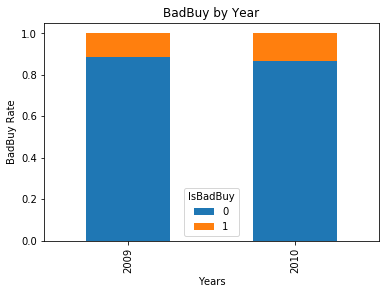

In [24]:
#Creation of the cross tab
pclass_xt = pd.crosstab(pre["PurchDate"].dt.year, pre['IsBadBuy'])
pclass_xt

# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

pclass_xt_pct.plot(kind='bar', stacked=True, 
                   title='BadBuy by Year')
plt.xlabel('Years')
plt.ylabel('BadBuy Rate')
plt.show()

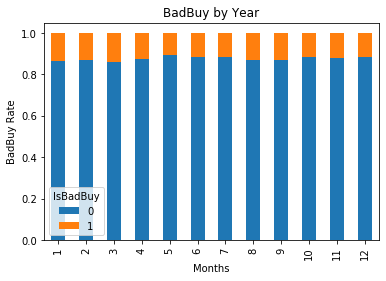

In [25]:
#Creation of the cross tab
pclass_xt = pd.crosstab(pre["PurchDate"].dt.month, pre['IsBadBuy'])
pclass_xt

# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

pclass_xt_pct.plot(kind='bar', stacked=True, 
                   title='BadBuy by Month')
plt.xlabel('Months')
plt.ylabel('BadBuy Rate')
plt.show()

# Auction
distribuzione omogenea

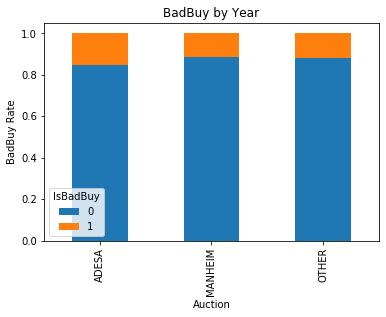

In [27]:
Variable='Auction'
#Creation of the cross tab
pclass_xt = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt

# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

pclass_xt_pct.plot(kind='bar', stacked=True, 
                   title='BadBuy by Auction')
plt.xlabel(Variable)
plt.ylabel('BadBuy Rate')
plt.show()

# VehYear
Percentuale di badbuy aumenta all'aumentare dell'età del veicolo

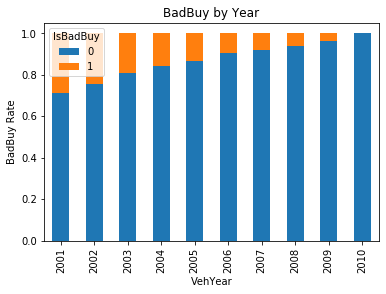

In [29]:
Variable='VehYear'
#Creation of the cross tab
pclass_xt = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt

# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

pclass_xt_pct.plot(kind='bar', stacked=True, 
                   title='BadBuy by VehYear')
plt.xlabel(Variable)
plt.ylabel('BadBuy Rate')
plt.show()

In [31]:
pre['VehYear'].value_counts()

2006    13668
2005    12367
2007     9129
2004     8126
2008     5502
2003     4990
2002     2731
2001     1188
2009      684
2010        1
Name: VehYear, dtype: int64

# VehicleAge
Percentuale di badbuy aumenta all'aumentare dell'età del veicolo

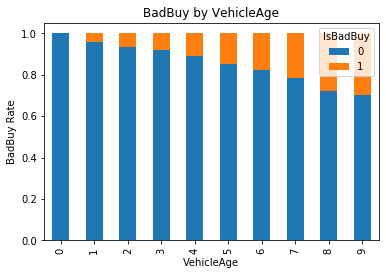

In [33]:
Variable='VehicleAge'
RealTitle='BadBuy by '
RealTitle=RealTitle+Variable

#Creation of the cross tab
pclass_xt = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt

# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

pclass_xt_pct.plot(kind='bar', stacked=True, 
                   title=RealTitle)
plt.xlabel(Variable)
plt.ylabel('BadBuy Rate')
plt.show()

In [36]:
pre[Variable].value_counts()

4    13684
3    12703
5    10303
2     6770
6     6382
7     3724
1     2509
8     1800
9      510
0        1
Name: VehicleAge, dtype: int64

# Make

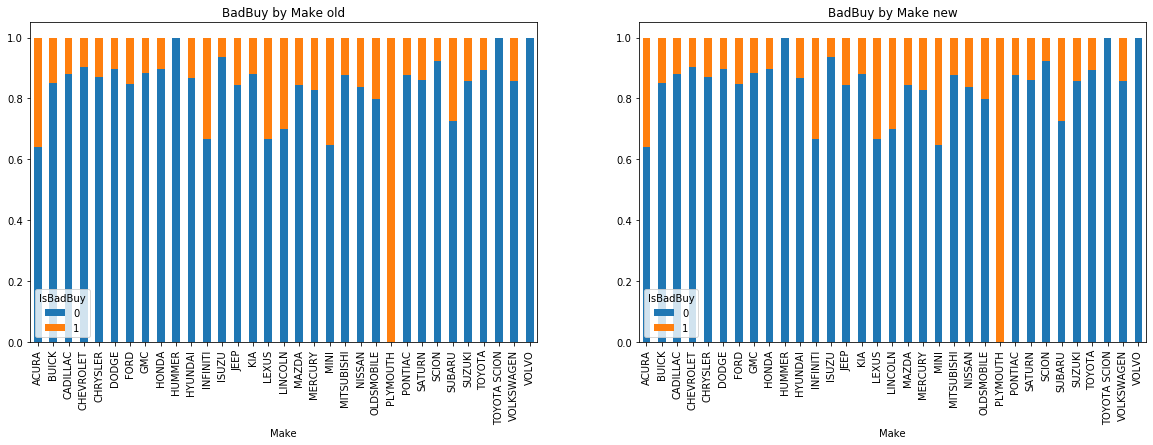

In [51]:
Variable='Make'
RealTitle='BadBuy by '
RealTitle=RealTitle+Variable
additional1=' old'
additional2=' new'

# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

#Creation of the cross tab
pclass_xt1 = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt1

#Normalize the cross tab to sum to 1:
pclass_xt_pct1 = pclass_xt1.div(pclass_xt1.sum(1).astype(float), axis=0)
pclass_xt_pct1

# Plot old Distribution
ax1 = plt.subplot2grid(fig_dims, (0, 0))
pclass_xt_pct1.plot(kind='bar', stacked=True, 
                   title=RealTitle+additional1, ax=ax1)

#Creation of the cross tab
pclass_xt2 = pd.crosstab(post[Variable], post['IsBadBuy'])
pclass_xt2

# Normalize the cross tab to sum to 1:
pclass_xt_pct2 = pclass_xt2.div(pclass_xt2.sum(1).astype(float), axis=0)
pclass_xt_pct2

# Plot new Distribution
ax2 = plt.subplot2grid(fig_dims, (0, 1))
pclass_xt_pct2.plot(kind='bar', stacked=True, 
                   title=RealTitle+additional2, ax=ax2)

plt.show()

In [52]:
pre[Variable].value_counts()

CHEVROLET       13842
DODGE           10355
FORD             9000
CHRYSLER         7093
PONTIAC          3421
KIA              2006
SATURN           1698
NISSAN           1687
HYUNDAI          1444
JEEP             1287
SUZUKI           1062
TOYOTA            905
MITSUBISHI        822
MAZDA             774
MERCURY           739
BUICK             562
GMC               502
HONDA             407
OLDSMOBILE        198
ISUZU             110
VOLKSWAGEN        104
SCION             102
LINCOLN            80
INFINITI           36
VOLVO              31
LEXUS              27
ACURA              25
CADILLAC           25
SUBARU             22
MINI               17
PLYMOUTH            1
TOYOTA SCION        1
HUMMER              1
Name: Make, dtype: int64

# Engine

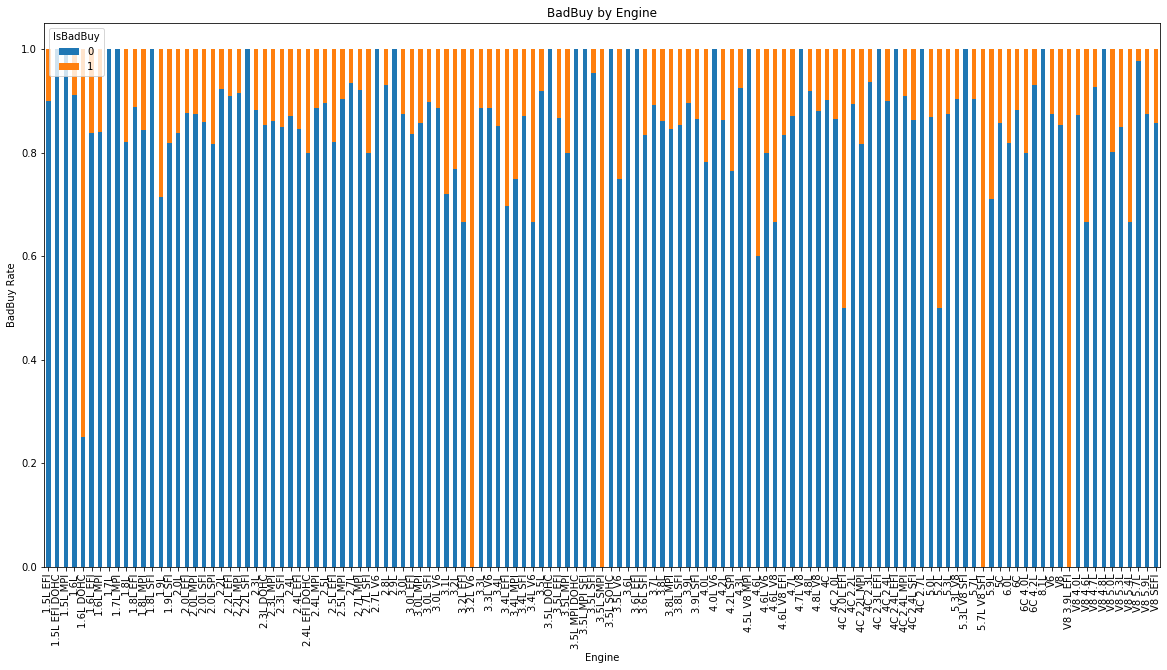

In [145]:
Variable='Engine'
RealTitle='BadBuy by '
RealTitle=RealTitle+Variable

#Creation of the cross tab
pclass_xt = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt

# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

pclass_xt_pct.plot(kind='bar', stacked=True, figsize=(20,10),
                   title=RealTitle)
plt.xlabel(Variable)
plt.ylabel('BadBuy Rate')
plt.show()

In [149]:
Count=pre[Variable].value_counts()
Count.loc[pre[Variable].value_counts()<2]

V8 3.9L EFI     1
3.5L DOHC       1
3.5L MPI SFI    1
8.1L            1
3.6L EFI        1
1.7L            1
5.3L V8 SFI     1
3.2L V6         1
3.5L SMPI       1
3.5L SOHC       1
Name: Engine, dtype: int64

In [153]:
pre.loc[pre[Variable]=='5.7L V8 SFI'][Variable].count()

2

# Trim

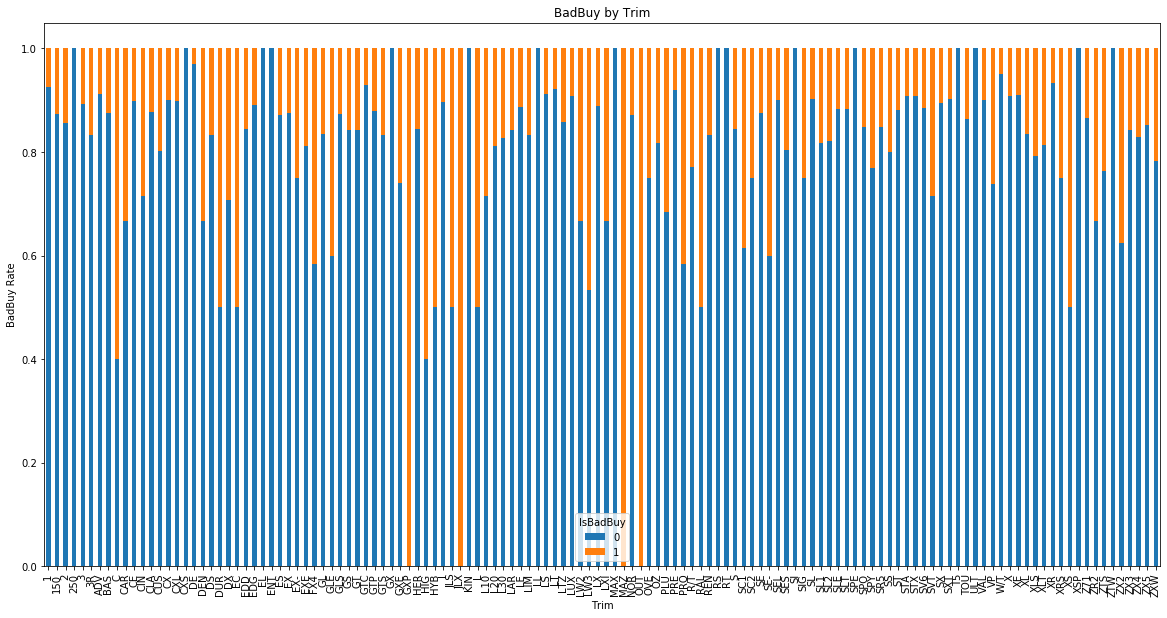

In [156]:
Variable='Trim'
RealTitle='BadBuy by '
RealTitle=RealTitle+Variable

#Creation of the cross tab
pclass_xt = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt

# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

pclass_xt_pct.plot(kind='bar', stacked=True, figsize=(20,10),
                   title=RealTitle)
plt.xlabel(Variable)
plt.ylabel('BadBuy Rate')
plt.show()

In [157]:
Count=pre[Variable].value_counts()
Count.loc[pre[Variable].value_counts()<2]

OUT    1
ULT    1
MAZ    1
LL     1
SI     1
XSP    1
JLX    1
Name: Trim, dtype: int64

In [161]:
pre.loc[pre[Variable]=='GXP'][Variable].count()

2

In [162]:
pre.loc[pre[Variable]=='GXP'][Variable].count()

2

In [160]:
pre.loc[pre[Variable]=='HIG'][Variable].count()

5

# SubModelSpecifics

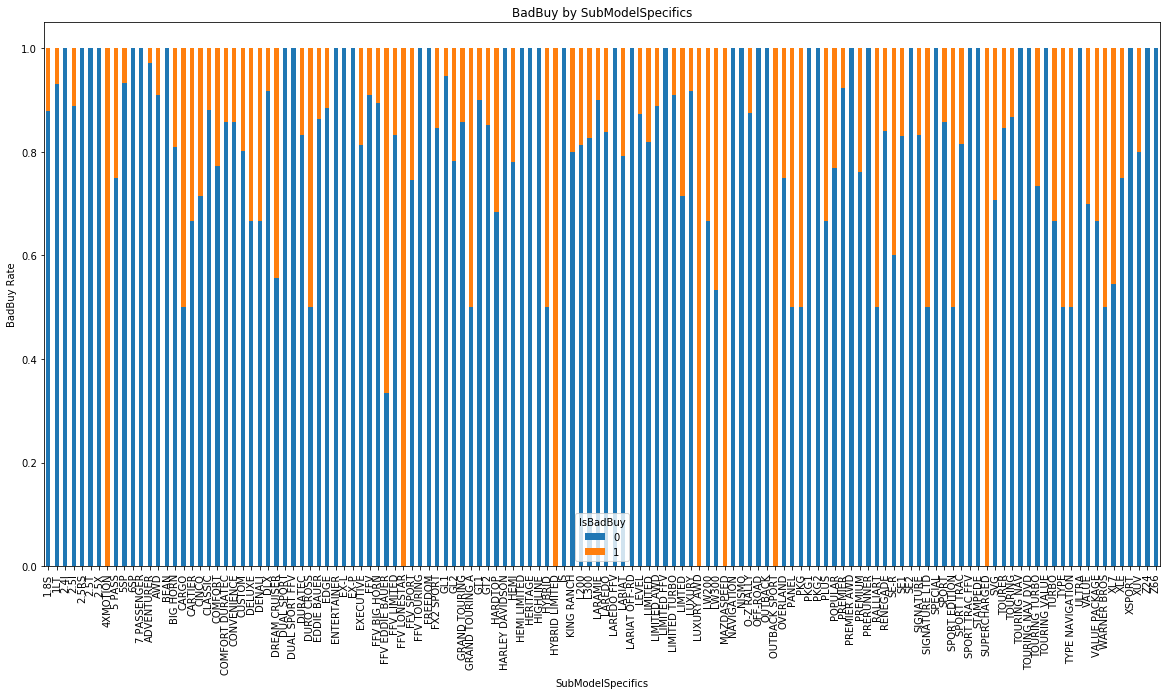

In [163]:
Variable='SubModelSpecifics'
RealTitle='BadBuy by '
RealTitle=RealTitle+Variable

#Creation of the cross tab
pclass_xt = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt

# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

pclass_xt_pct.plot(kind='bar', stacked=True, figsize=(20,10),
                   title=RealTitle)
plt.xlabel(Variable)
plt.ylabel('BadBuy Rate')
plt.show()

In [164]:
Count=pre[Variable].value_counts()
Count.loc[pre[Variable].value_counts()<2]

TOURING NAV        1
HYBRID LIMITED     1
4XMOTION           1
TOURING NAV DVD    1
OUTBACK            1
TOURING VALUE      1
FREEDOM            1
OUTBACK SPORT      1
DUAL SPORT FFV     1
MAZDASPEED         1
BEAN               1
DUAL SPORT         1
SPORT TRAC FFV     1
NISMO              1
LUXURY AWD         1
FFV LONESTAR       1
OFF-ROAD           1
2.5RS              1
SUPERCHARGED       1
ULTRA              1
2.5T               1
Name: SubModelSpecifics, dtype: int64

# Color

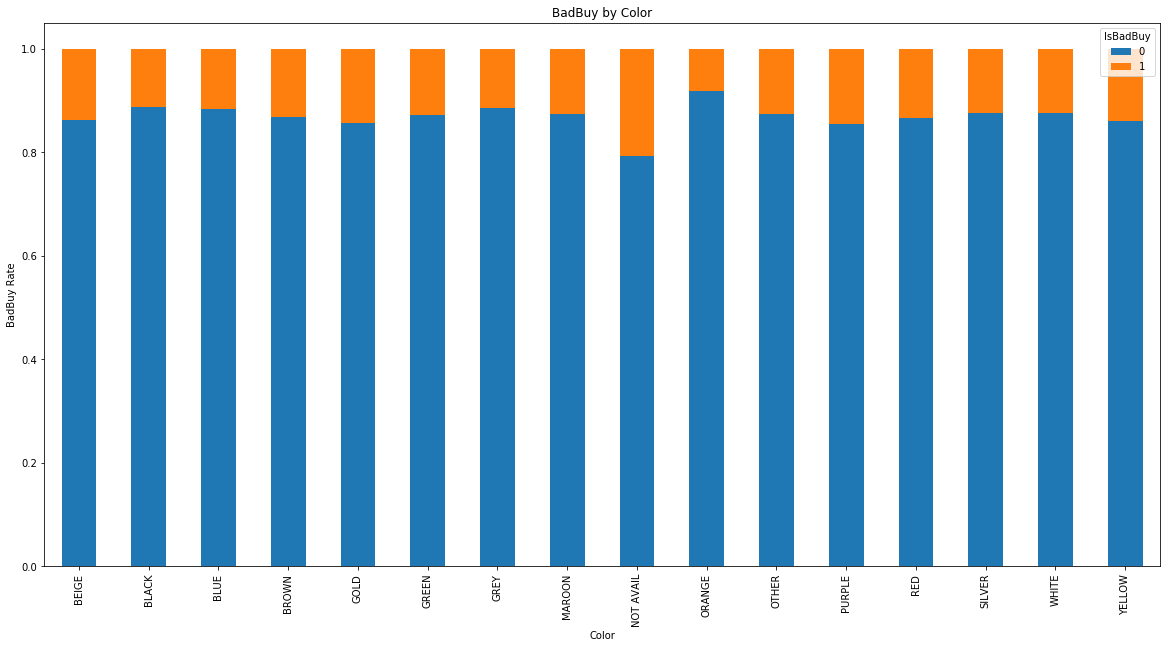

In [64]:
Variable='Color'
RealTitle='BadBuy by '
RealTitle=RealTitle+Variable

#Creation of the cross tab
pclass_xt = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt

# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

pclass_xt_pct.plot(kind='bar', stacked=True, figsize=(20,10),
                   title=RealTitle)
plt.xlabel(Variable)
plt.ylabel('BadBuy Rate')
plt.show()

# Transmission

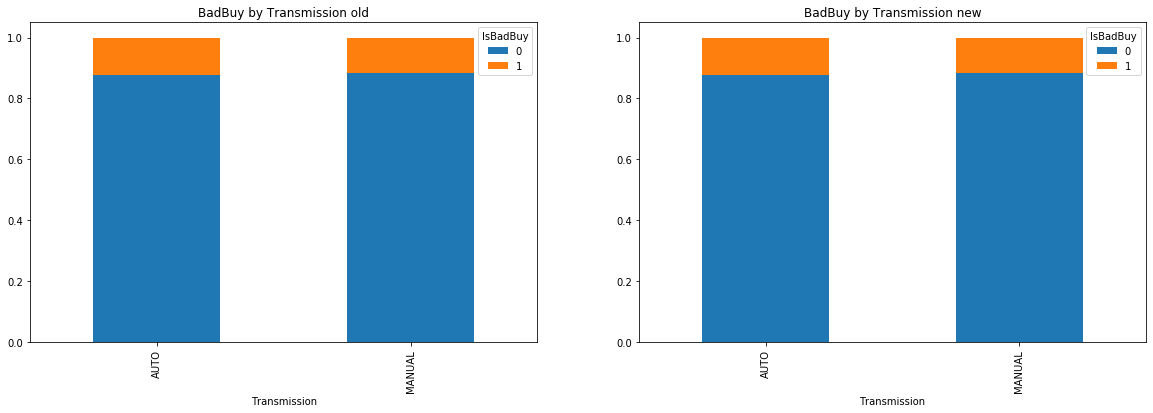

In [66]:
Variable='Transmission'
RealTitle='BadBuy by '
RealTitle=RealTitle+Variable
additional1=' old'
additional2=' new'

# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

#Creation of the cross tab
pclass_xt1 = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt1

#Normalize the cross tab to sum to 1:
pclass_xt_pct1 = pclass_xt1.div(pclass_xt1.sum(1).astype(float), axis=0)
pclass_xt_pct1

# Plot old Distribution
ax1 = plt.subplot2grid(fig_dims, (0, 0))
pclass_xt_pct1.plot(kind='bar', stacked=True, 
                   title=RealTitle+additional1, ax=ax1)

#Creation of the cross tab
pclass_xt2 = pd.crosstab(post[Variable], post['IsBadBuy'])
pclass_xt2

# Normalize the cross tab to sum to 1:
pclass_xt_pct2 = pclass_xt2.div(pclass_xt2.sum(1).astype(float), axis=0)
pclass_xt_pct2

# Plot new Distribution
ax2 = plt.subplot2grid(fig_dims, (0, 1))
pclass_xt_pct2.plot(kind='bar', stacked=True, 
                   title=RealTitle+additional2, ax=ax2)

plt.show()

# WheelTypeID

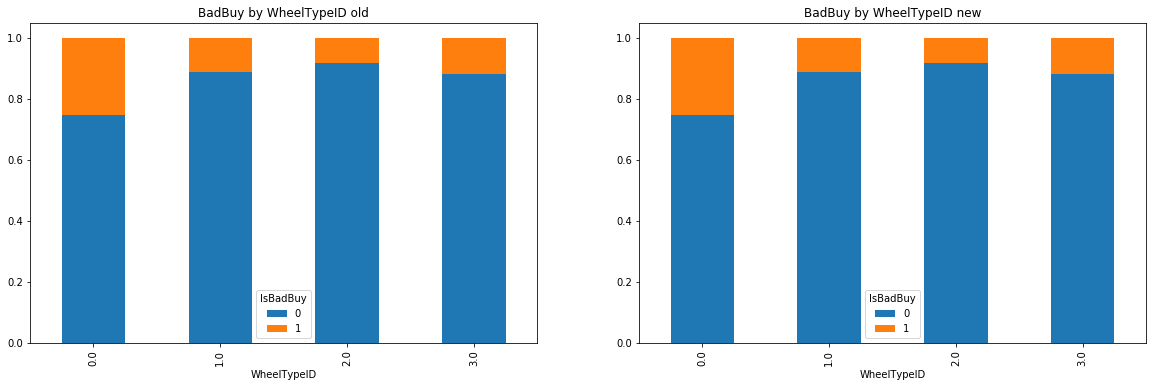

In [69]:
Variable='WheelTypeID'
RealTitle='BadBuy by '
RealTitle=RealTitle+Variable
additional1=' old'
additional2=' new'

# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

#Creation of the cross tab
pclass_xt1 = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt1

#Normalize the cross tab to sum to 1:
pclass_xt_pct1 = pclass_xt1.div(pclass_xt1.sum(1).astype(float), axis=0)
pclass_xt_pct1

# Plot old Distribution
ax1 = plt.subplot2grid(fig_dims, (0, 0))
pclass_xt_pct1.plot(kind='bar', stacked=True, 
                   title=RealTitle+additional1, ax=ax1)

#Creation of the cross tab
pclass_xt2 = pd.crosstab(post[Variable], post['IsBadBuy'])
pclass_xt2

# Normalize the cross tab to sum to 1:
pclass_xt_pct2 = pclass_xt2.div(pclass_xt2.sum(1).astype(float), axis=0)
pclass_xt_pct2

# Plot new Distribution
ax2 = plt.subplot2grid(fig_dims, (0, 1))
pclass_xt_pct2.plot(kind='bar', stacked=True, 
                   title=RealTitle+additional2, ax=ax2)

plt.show()

# Nationality

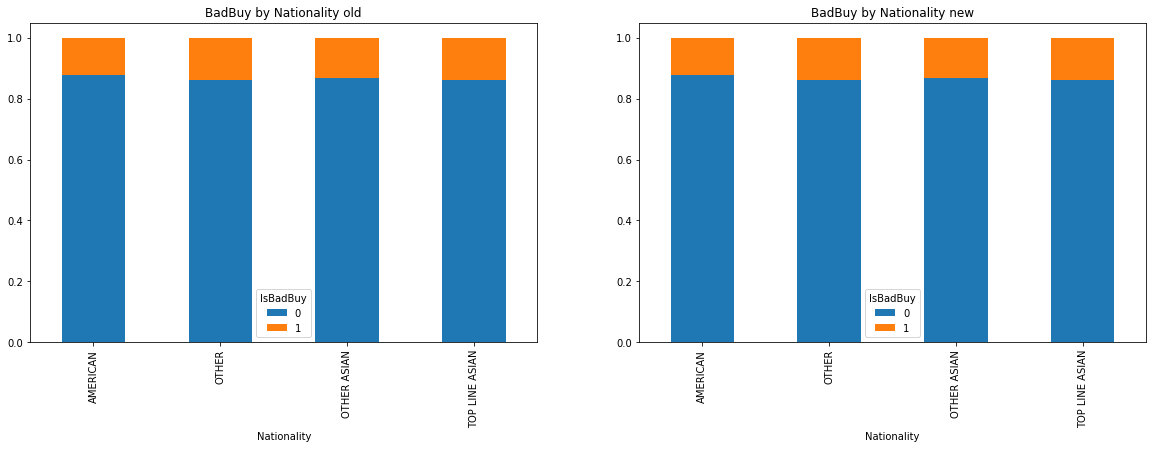

In [72]:
Variable='Nationality'
RealTitle='BadBuy by '
RealTitle=RealTitle+Variable
additional1=' old'
additional2=' new'

# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

#Creation of the cross tab
pclass_xt1 = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt1

#Normalize the cross tab to sum to 1:
pclass_xt_pct1 = pclass_xt1.div(pclass_xt1.sum(1).astype(float), axis=0)
pclass_xt_pct1

# Plot old Distribution
ax1 = plt.subplot2grid(fig_dims, (0, 0))
pclass_xt_pct1.plot(kind='bar', stacked=True, 
                   title=RealTitle+additional1, ax=ax1)

#Creation of the cross tab
pclass_xt2 = pd.crosstab(post[Variable], post['IsBadBuy'])
pclass_xt2

# Normalize the cross tab to sum to 1:
pclass_xt_pct2 = pclass_xt2.div(pclass_xt2.sum(1).astype(float), axis=0)
pclass_xt_pct2

# Plot new Distribution
ax2 = plt.subplot2grid(fig_dims, (0, 1))
pclass_xt_pct2.plot(kind='bar', stacked=True, 
                   title=RealTitle+additional2, ax=ax2)

plt.show()

# Size

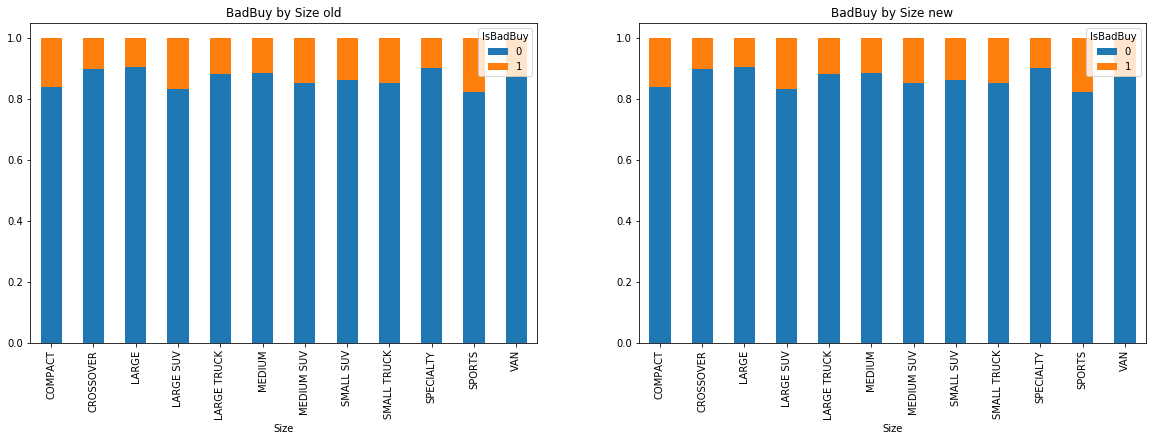

In [75]:
Variable='Size'
RealTitle='BadBuy by '
RealTitle=RealTitle+Variable
additional1=' old'
additional2=' new'

# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

#Creation of the cross tab
pclass_xt1 = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt1

#Normalize the cross tab to sum to 1:
pclass_xt_pct1 = pclass_xt1.div(pclass_xt1.sum(1).astype(float), axis=0)
pclass_xt_pct1

# Plot old Distribution
ax1 = plt.subplot2grid(fig_dims, (0, 0))
pclass_xt_pct1.plot(kind='bar', stacked=True, 
                   title=RealTitle+additional1, ax=ax1)

#Creation of the cross tab
pclass_xt2 = pd.crosstab(post[Variable], post['IsBadBuy'])
pclass_xt2

# Normalize the cross tab to sum to 1:
pclass_xt_pct2 = pclass_xt2.div(pclass_xt2.sum(1).astype(float), axis=0)
pclass_xt_pct2

# Plot new Distribution
ax2 = plt.subplot2grid(fig_dims, (0, 1))
pclass_xt_pct2.plot(kind='bar', stacked=True, 
                   title=RealTitle+additional2, ax=ax2)

plt.show()

# TopThreeAmericanName

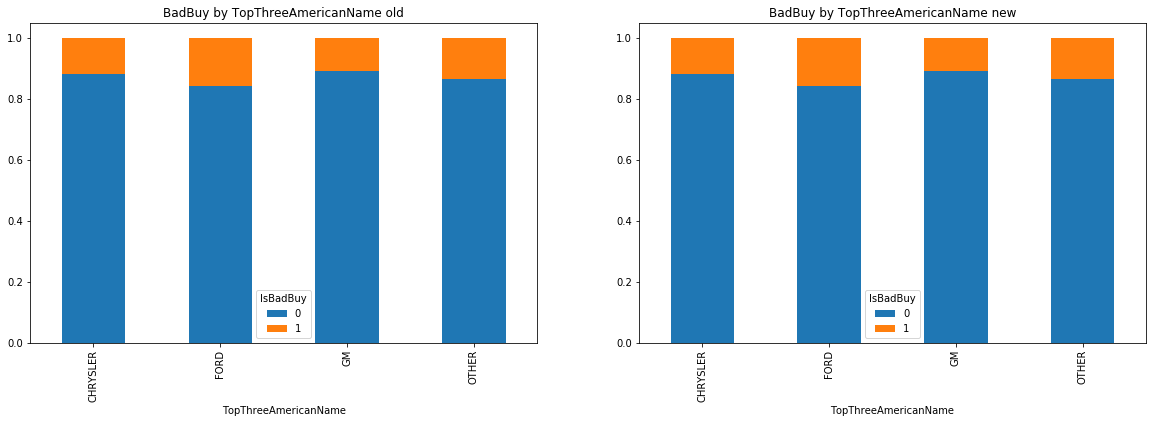

In [77]:
Variable='TopThreeAmericanName'
RealTitle='BadBuy by '
RealTitle=RealTitle+Variable
additional1=' old'
additional2=' new'

# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

#Creation of the cross tab
pclass_xt1 = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt1

#Normalize the cross tab to sum to 1:
pclass_xt_pct1 = pclass_xt1.div(pclass_xt1.sum(1).astype(float), axis=0)
pclass_xt_pct1

# Plot old Distribution
ax1 = plt.subplot2grid(fig_dims, (0, 0))
pclass_xt_pct1.plot(kind='bar', stacked=True, 
                   title=RealTitle+additional1, ax=ax1)

#Creation of the cross tab
pclass_xt2 = pd.crosstab(post[Variable], post['IsBadBuy'])
pclass_xt2

# Normalize the cross tab to sum to 1:
pclass_xt_pct2 = pclass_xt2.div(pclass_xt2.sum(1).astype(float), axis=0)
pclass_xt_pct2

# Plot new Distribution
ax2 = plt.subplot2grid(fig_dims, (0, 1))
pclass_xt_pct2.plot(kind='bar', stacked=True, 
                   title=RealTitle+additional2, ax=ax2)

plt.show()

# PrimeUnit

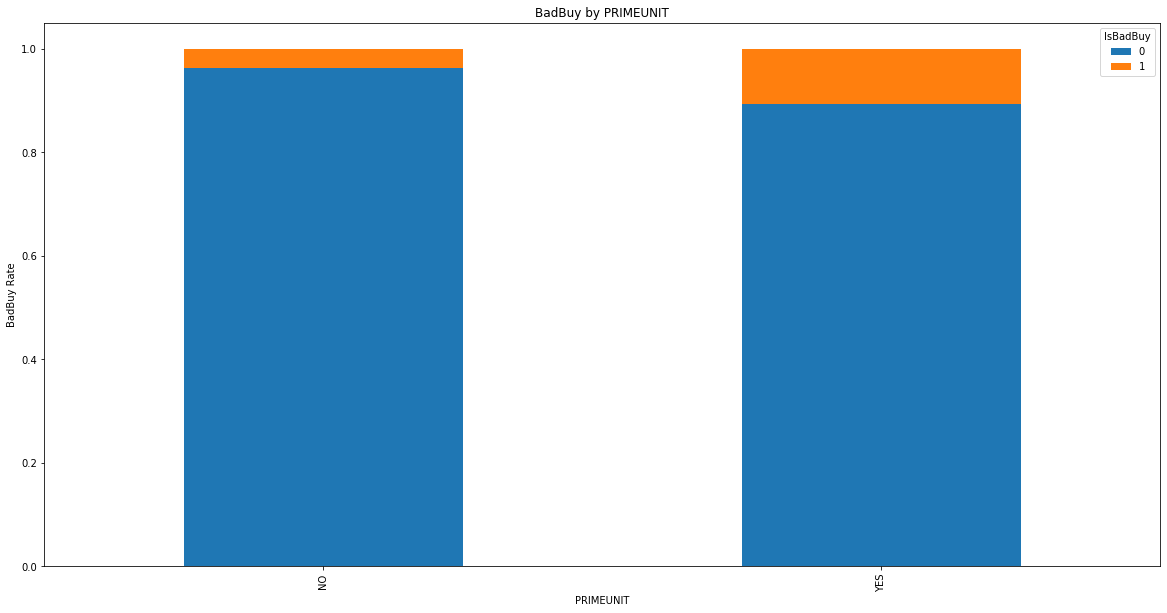

In [84]:
Variable='PRIMEUNIT'
RealTitle='BadBuy by '
RealTitle=RealTitle+Variable

#Creation of the cross tab
pclass_xt = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt

# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

pclass_xt_pct.plot(kind='bar', stacked=True, figsize=(20,10),
                   title=RealTitle)
plt.xlabel(Variable)
plt.ylabel('BadBuy Rate')
plt.show()

In [85]:
pre[Variable].value_counts()

NO     2627
YES      56
Name: PRIMEUNIT, dtype: int64

# AUCGUART

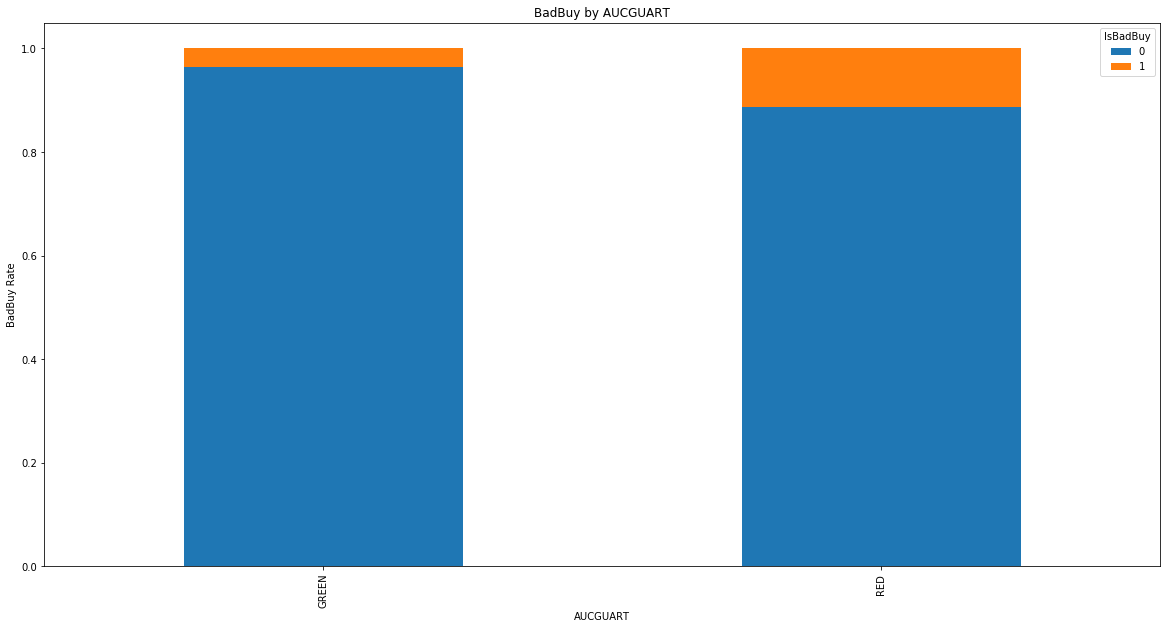

In [82]:
Variable='AUCGUART'
RealTitle='BadBuy by '
RealTitle=RealTitle+Variable

#Creation of the cross tab
pclass_xt = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt

# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

pclass_xt_pct.plot(kind='bar', stacked=True, figsize=(20,10),
                   title=RealTitle)
plt.xlabel(Variable)
plt.ylabel('BadBuy Rate')
plt.show()

In [83]:
pre[Variable].value_counts()

GREEN    2621
RED        62
Name: AUCGUART, dtype: int64

# BYRNO

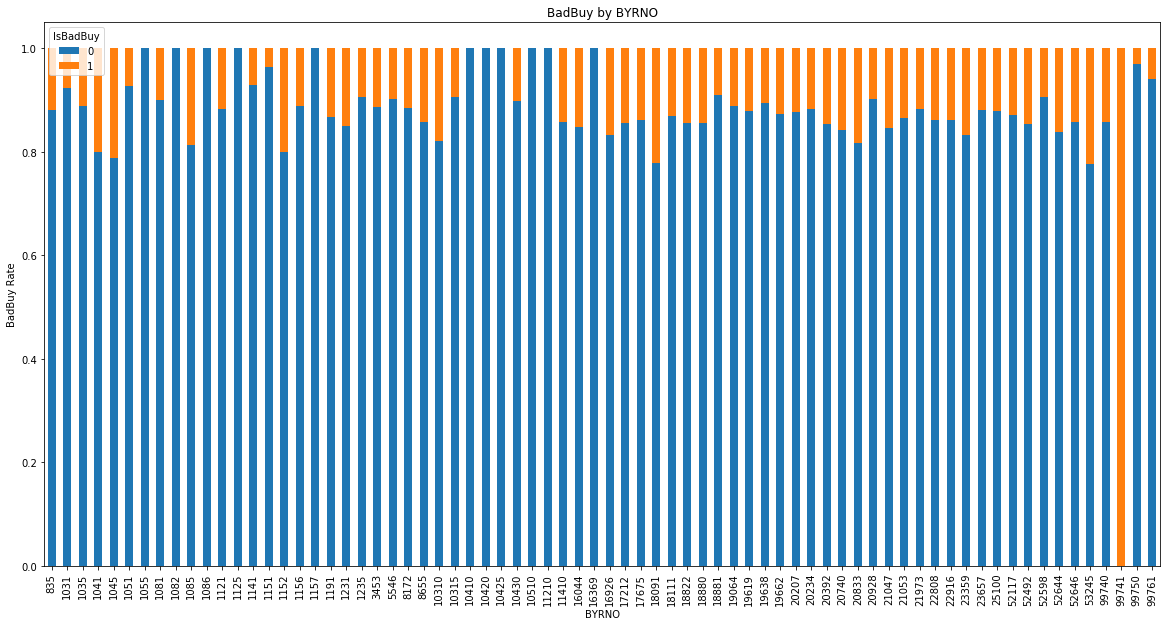

In [165]:
Variable='BYRNO'
RealTitle='BadBuy by '
RealTitle=RealTitle+Variable

#Creation of the cross tab
pclass_xt = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt

# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

pclass_xt_pct.plot(kind='bar', stacked=True, figsize=(20,10),
                   title=RealTitle)
plt.xlabel(Variable)
plt.ylabel('BadBuy Rate')
plt.show()

In [166]:
Count=pre[Variable].value_counts()
Count.loc[pre[Variable].value_counts()<2]

1157     1
10425    1
99741    1
1086     1
Name: BYRNO, dtype: int64

# VNZIP1

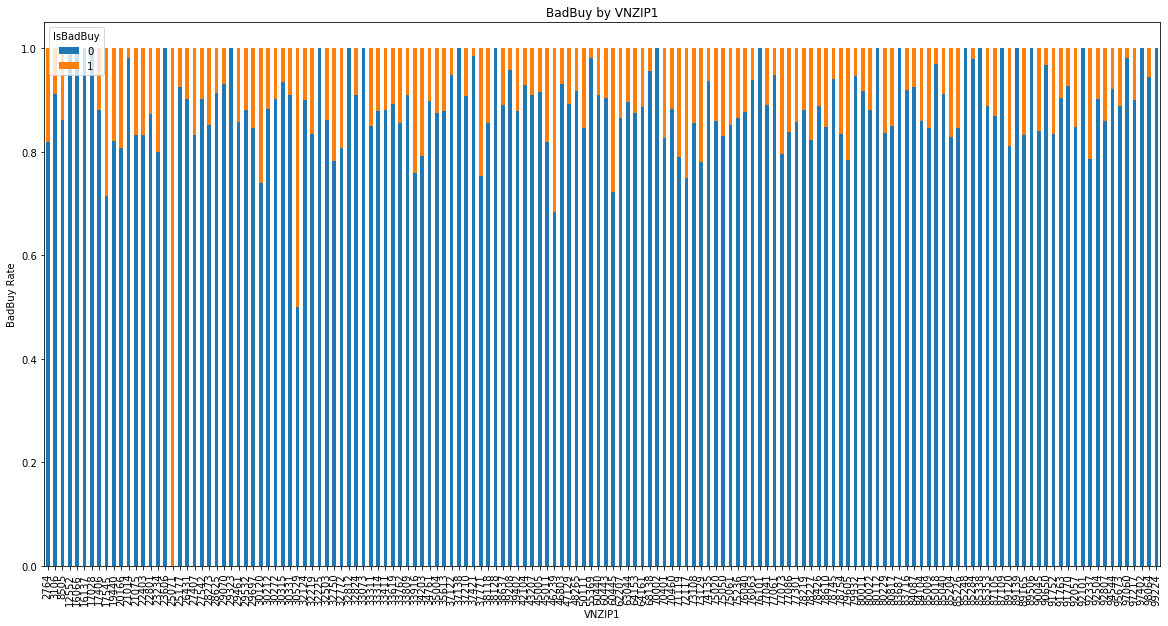

In [167]:
Variable='VNZIP1'
RealTitle='BadBuy by '
RealTitle=RealTitle+Variable

#Creation of the cross tab
pclass_xt = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt

# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

pclass_xt_pct.plot(kind='bar', stacked=True, figsize=(20,10),
                   title=RealTitle)
plt.xlabel(Variable)
plt.ylabel('BadBuy Rate')
plt.show()

In [168]:
Count=pre[Variable].value_counts()
Count.loc[pre[Variable].value_counts()<2]

25071    1
85248    1
85338    1
80112    1
76101    1
Name: VNZIP1, dtype: int64

# VNST

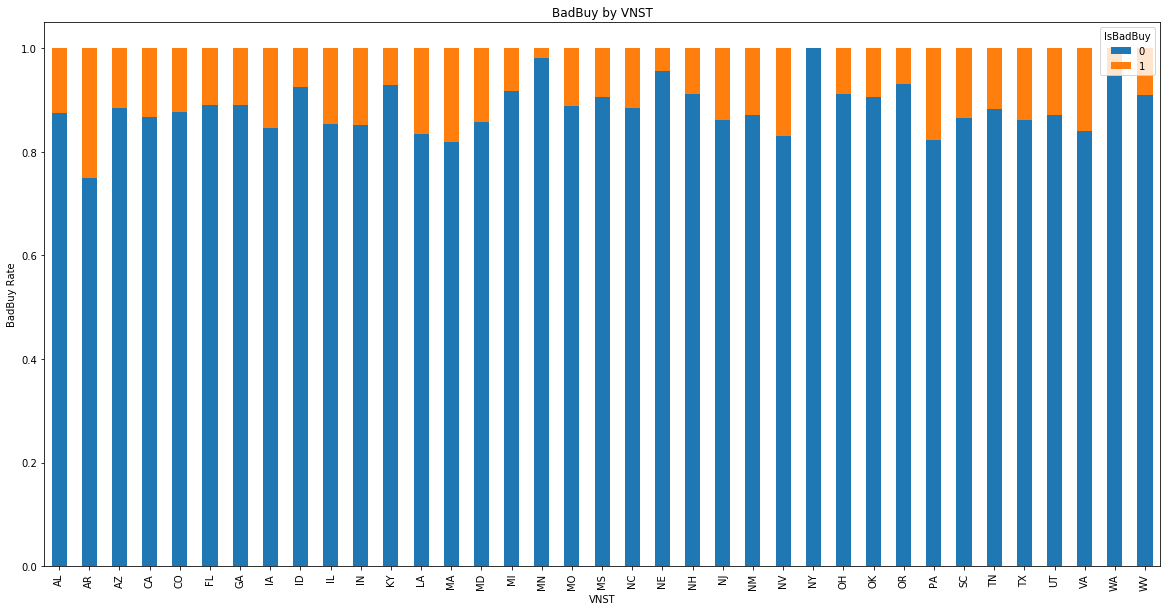

In [98]:
Variable='VNST'
RealTitle='BadBuy by '
RealTitle=RealTitle+Variable

#Creation of the cross tab
pclass_xt = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt

# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

pclass_xt_pct.plot(kind='bar', stacked=True, figsize=(20,10),
                   title=RealTitle)
plt.xlabel(Variable)
plt.ylabel('BadBuy Rate')
plt.show()

# IsOnlineSale

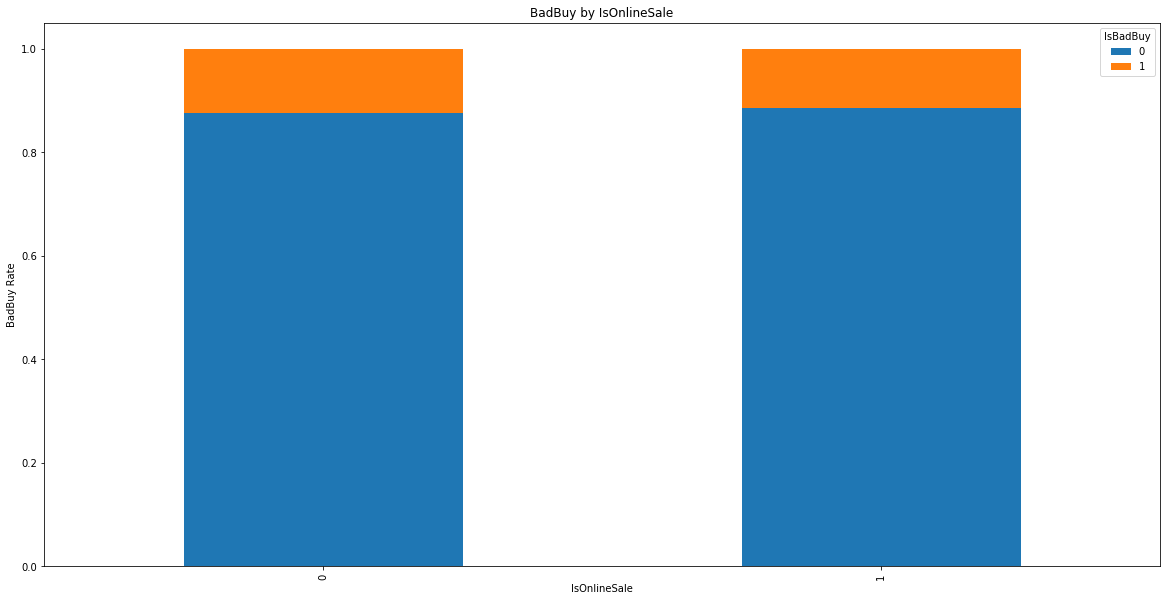

In [100]:
Variable='IsOnlineSale'
RealTitle='BadBuy by '
RealTitle=RealTitle+Variable

#Creation of the cross tab
pclass_xt = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt

# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

pclass_xt_pct.plot(kind='bar', stacked=True, figsize=(20,10),
                   title=RealTitle)
plt.xlabel(Variable)
plt.ylabel('BadBuy Rate')
plt.show()

In [101]:
pre[Variable].value_counts()

0    56887
1     1499
Name: IsOnlineSale, dtype: int64

# Model

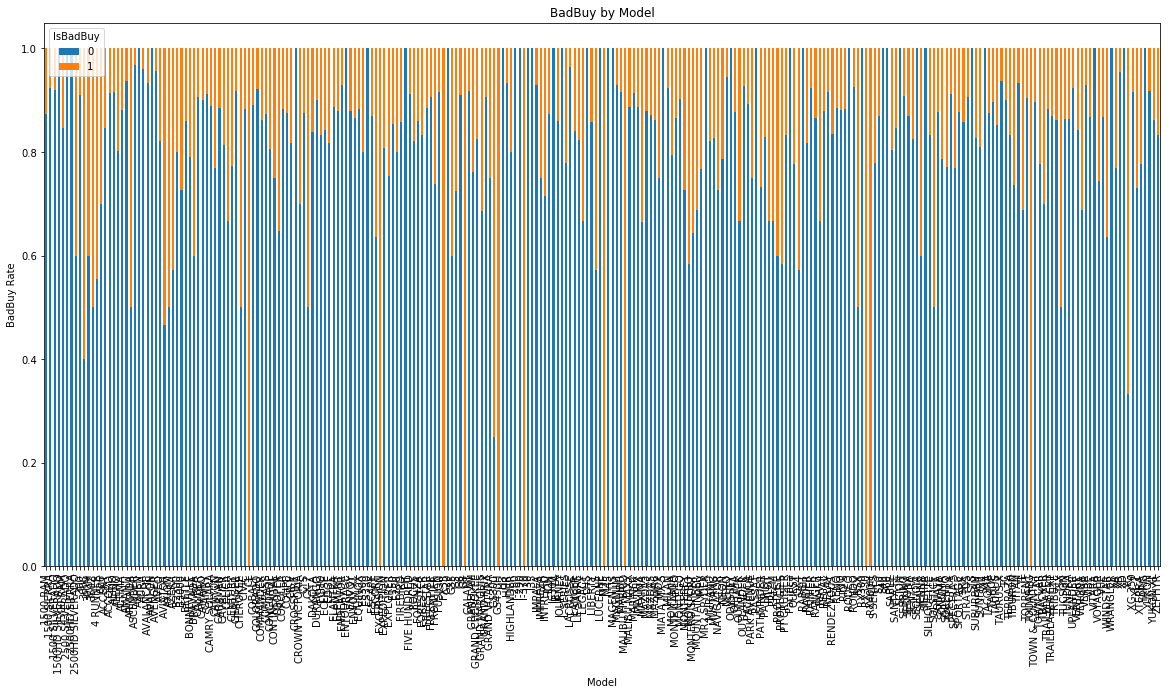

In [169]:
Variable='Model'
RealTitle='BadBuy by '
RealTitle=RealTitle+Variable

#Creation of the cross tab
pclass_xt = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt

# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

pclass_xt_pct.plot(kind='bar', stacked=True, figsize=(20,10),
                   title=RealTitle)
plt.xlabel(Variable)
plt.ylabel('BadBuy Rate')
plt.show()

In [170]:
Count=pre[Variable].value_counts()
Count.loc[pre[Variable].value_counts()<2]

RX330            1
G8               1
GS450H           1
TOUAREG          1
G20              1
Pacifica         1
FX35             1
H3               1
CL               1
I-290            1
S60              1
2500HD SIERRA    1
PASSAT           1
MR2 SPYDER       1
MALIBU HYBRID    1
LHS              1
IS300            1
EXCURSION        1
FIT              1
I-370            1
SIERRA           1
Name: Model, dtype: int64

# WheelDrive

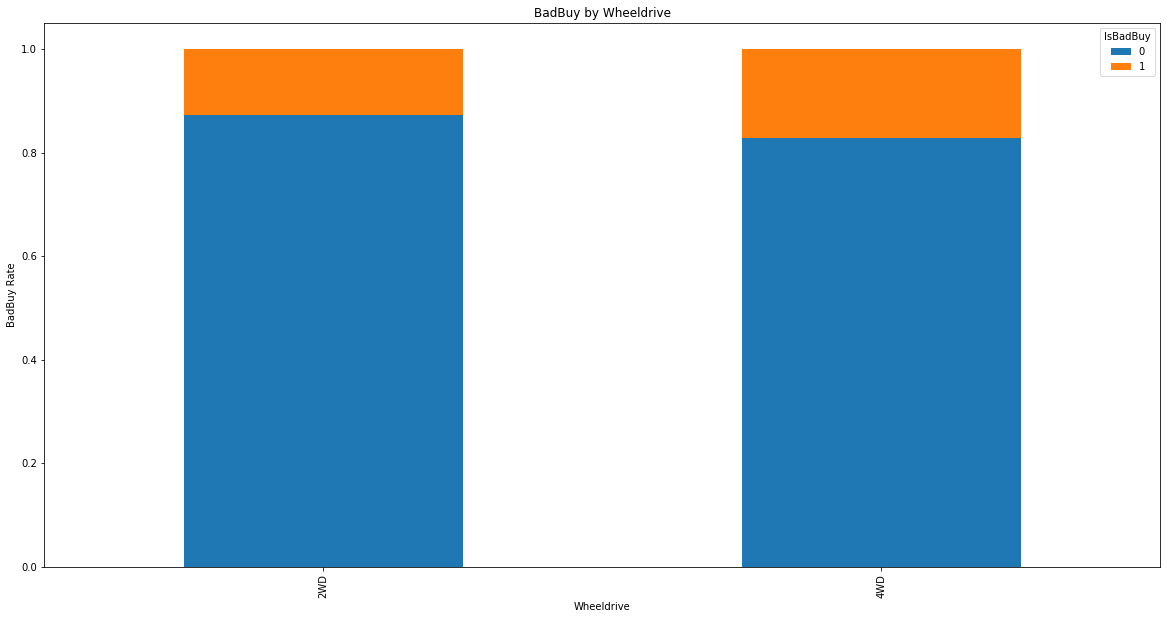

In [106]:
Variable='Wheeldrive'
RealTitle='BadBuy by '
RealTitle=RealTitle+Variable

#Creation of the cross tab
pclass_xt = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt

# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

pclass_xt_pct.plot(kind='bar', stacked=True, figsize=(20,10),
                   title=RealTitle)
plt.xlabel(Variable)
plt.ylabel('BadBuy Rate')
plt.show()

# Doors

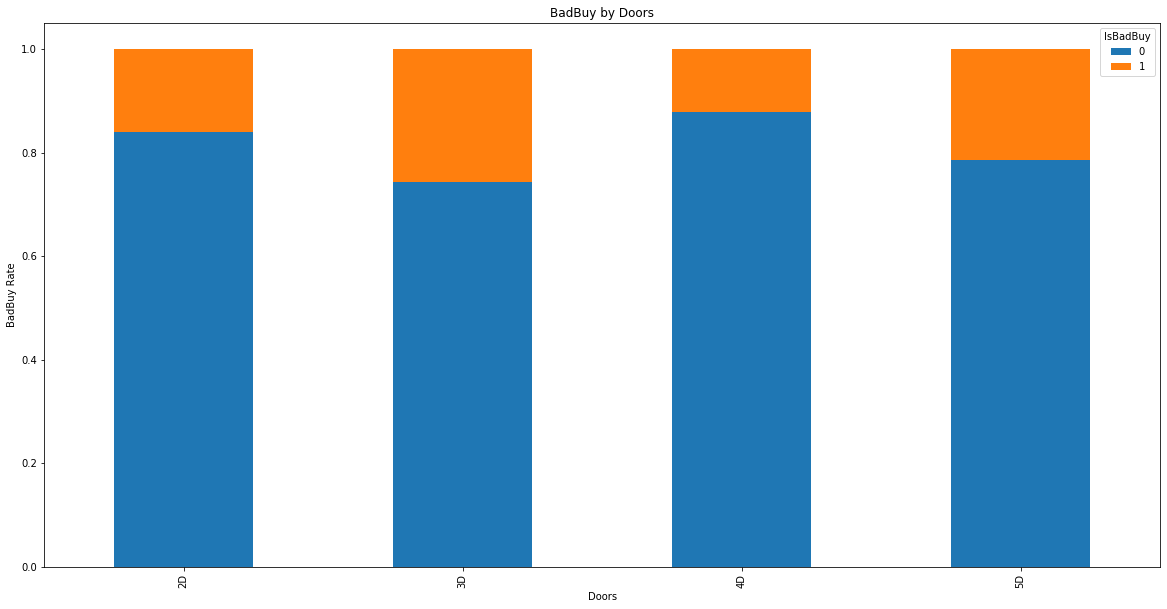

In [108]:
Variable='Doors'
RealTitle='BadBuy by '
RealTitle=RealTitle+Variable

#Creation of the cross tab
pclass_xt = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt

# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

pclass_xt_pct.plot(kind='bar', stacked=True, figsize=(20,10),
                   title=RealTitle)
plt.xlabel(Variable)
plt.ylabel('BadBuy Rate')
plt.show()

# SubModel

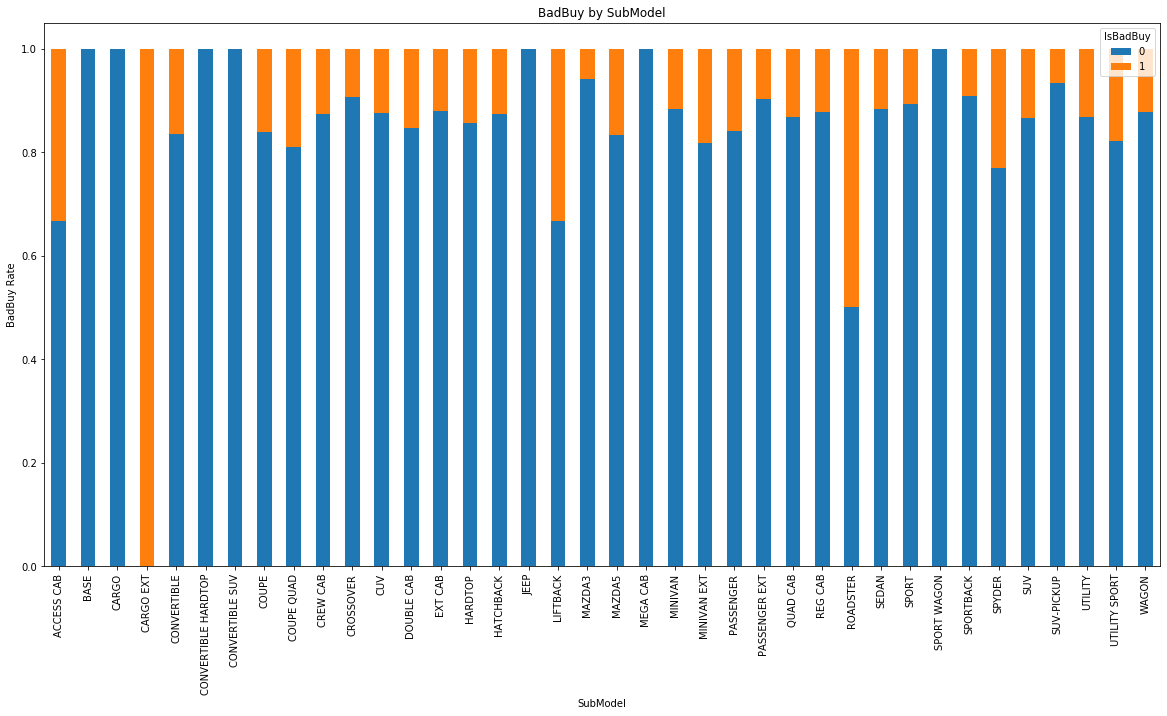

In [171]:
Variable='SubModel'
RealTitle='BadBuy by '
RealTitle=RealTitle+Variable

#Creation of the cross tab
pclass_xt = pd.crosstab(pre[Variable], pre['IsBadBuy'])
pclass_xt

# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

pclass_xt_pct.plot(kind='bar', stacked=True, figsize=(20,10),
                   title=RealTitle)
plt.xlabel(Variable)
plt.ylabel('BadBuy Rate')
plt.show()

In [173]:
Count=pre[Variable].value_counts()
Count.loc[pre[Variable].value_counts()<3]

CARGO EXT              2
CONVERTIBLE SUV        2
CONVERTIBLE HARDTOP    2
ROADSTER               2
SPORT WAGON            1
CARGO                  1
Name: SubModel, dtype: int64

# ANALISI ATTRIBUTI NUMERICI

# MMRAcquisitionAuctionAveragePrice

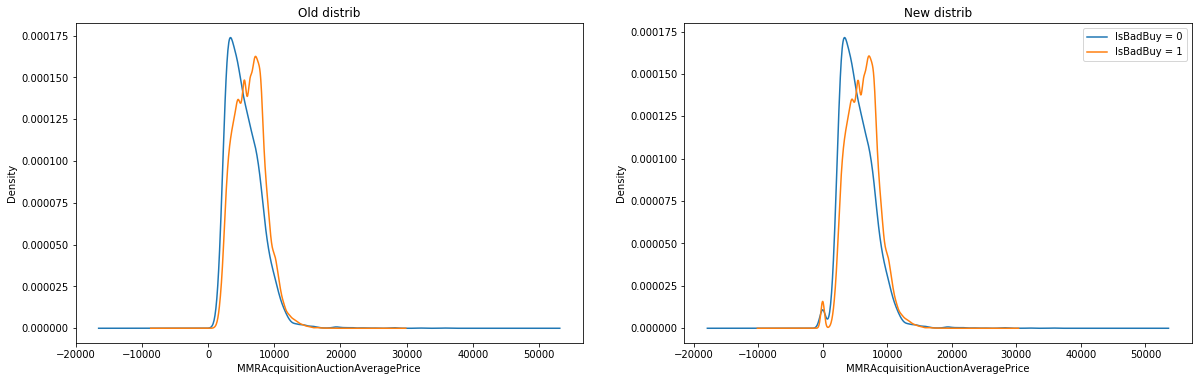

In [194]:
Variable='MMRAcquisitionAuctionAveragePrice'

#Modifica a pre per rendere equiparabili i grafici
pre[Variable].replace(0, np.nan, inplace=True)

# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

# Plot old Distribution
ax1=plt.subplot2grid(fig_dims, (0, 0), title='Old distrib', xlabel=Variable)
for IsBadBuy_Class in pre['IsBadBuy'].unique():
    pre[Variable][pre.IsBadBuy == IsBadBuy_Class].plot(kind='kde')
    

# Plot new Distribution
ax2=plt.subplot2grid(fig_dims, (0, 1), title='New distrib', xlabel=Variable)
for IsBadBuy_Class in post['IsBadBuy'].unique():
    post[Variable][post.IsBadBuy == IsBadBuy_Class].plot(kind='kde')

plt.legend(('IsBadBuy = 0', 'IsBadBuy = 1'), loc='best')
    
plt.show()

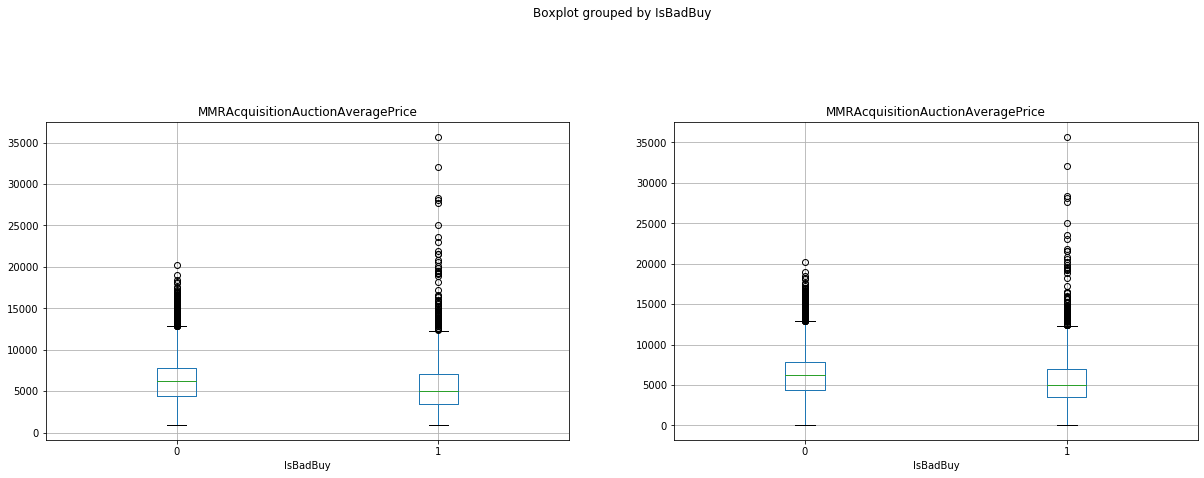

In [121]:
# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

# Plot old Distribution
ax1=plt.subplot2grid(fig_dims, (0, 0), title='Old distrib')
pre.boxplot(column=[Variable], by='IsBadBuy', ax=ax1)

# Plot new Distribution
ax2=plt.subplot2grid(fig_dims, (0, 1), title='New distrib')
post.boxplot(column=[Variable], by='IsBadBuy', ax=ax2)

plt.show()

# MMRAcquisitionAuctionCleanPrice

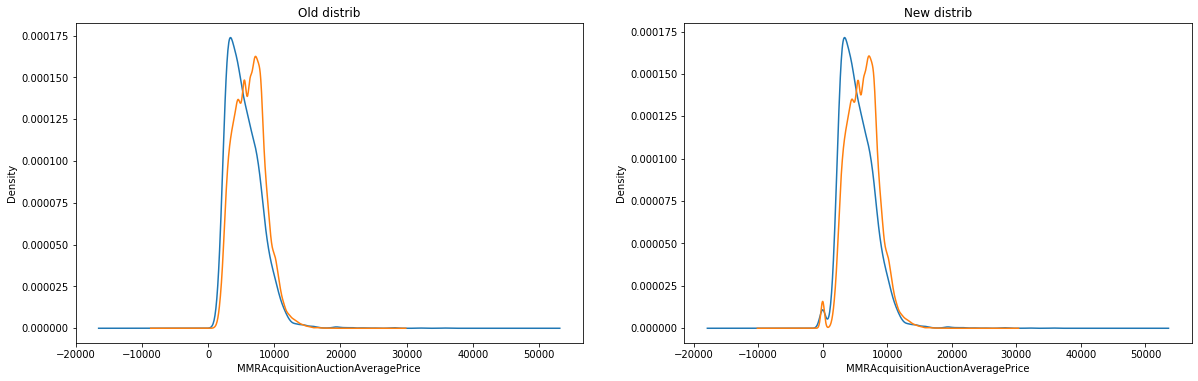

In [122]:
Variable='MMRAcquisitionAuctionCleanPrice'

#Modifica a pre per rendere equiparabili i grafici
pre[Variable].replace(0, np.nan, inplace=True)
pre[Variable].replace(1, np.nan, inplace=True)

# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0), title='Old distrib', xlabel=Variable)
for IsBadBuy_Class in pre['IsBadBuy'].unique():
    pre[Variable][pre.IsBadBuy == IsBadBuy_Class].plot(kind='kde')

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1), title='New distrib', xlabel=Variable)
for IsBadBuy_Class in post['IsBadBuy'].unique():
    post[Variable][post.IsBadBuy == IsBadBuy_Class].plot(kind='kde')

plt.show()

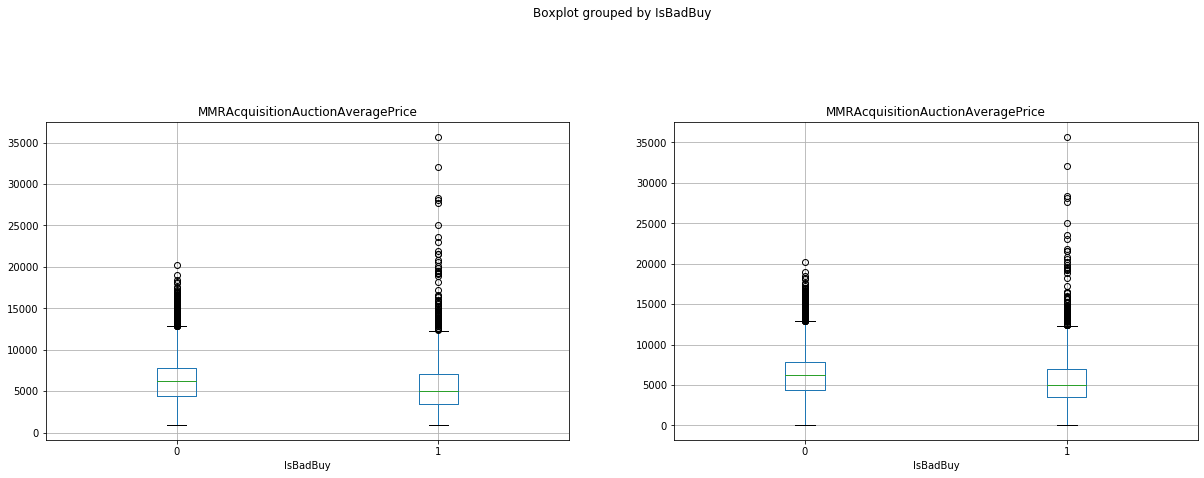

In [123]:
# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

# Plot old Distribution
ax1=plt.subplot2grid(fig_dims, (0, 0), title='Old distrib')
pre.boxplot(column=[Variable], by='IsBadBuy', ax=ax1)

# Plot new Distribution
ax2=plt.subplot2grid(fig_dims, (0, 1), title='New distrib')
post.boxplot(column=[Variable], by='IsBadBuy', ax=ax2)

plt.show()

# MMRAcquisitionRetailAveragePrice

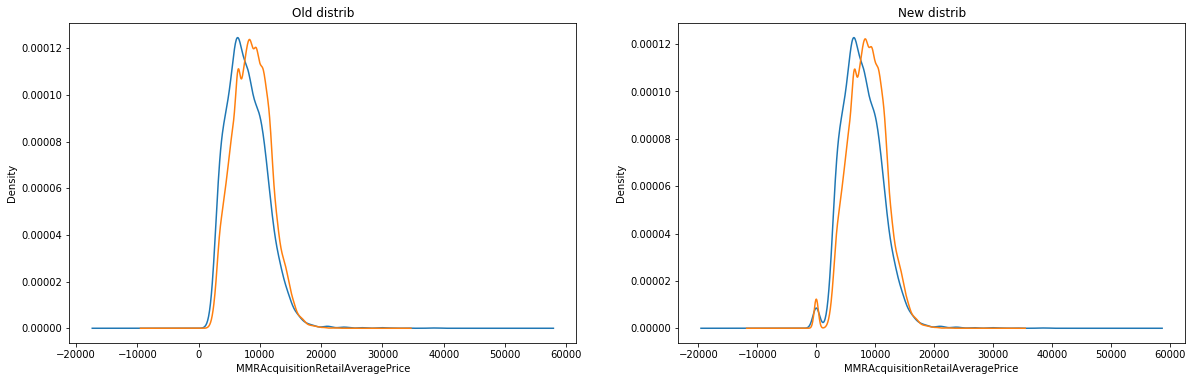

In [130]:
Variable='MMRAcquisitionRetailAveragePrice'

#Modifica a pre per rendere equiparabili i grafici
pre[Variable].replace(0, np.nan, inplace=True)

# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0), title='Old distrib', xlabel=Variable)
for IsBadBuy_Class in pre['IsBadBuy'].unique():
    pre[Variable][pre.IsBadBuy == IsBadBuy_Class].plot(kind='kde')

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1), title='New distrib', xlabel=Variable)
for IsBadBuy_Class in post['IsBadBuy'].unique():
    post[Variable][post.IsBadBuy == IsBadBuy_Class].plot(kind='kde')

plt.show()

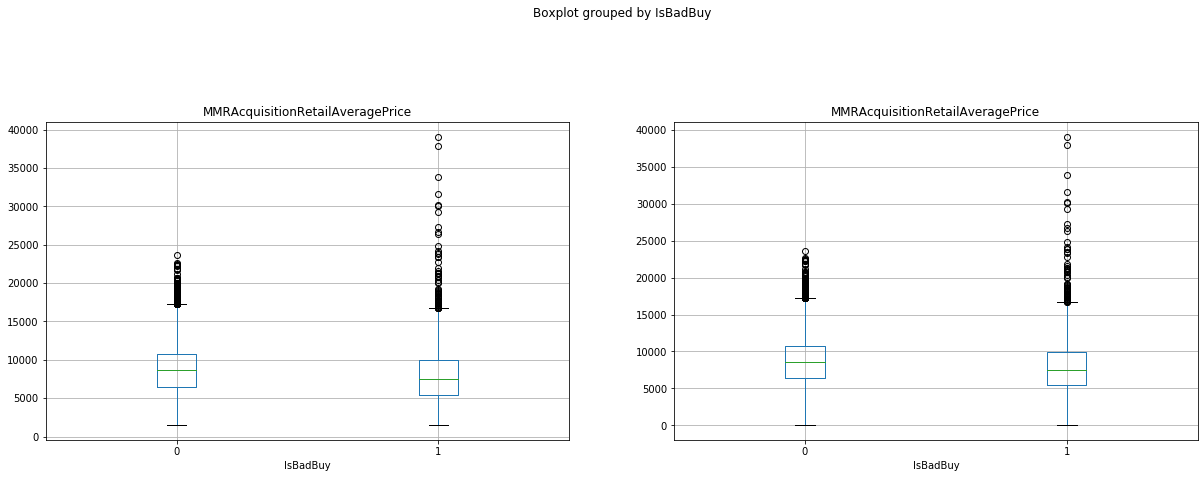

In [125]:
# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

# Plot old Distribution
ax1=plt.subplot2grid(fig_dims, (0, 0), title='Old distrib')
pre.boxplot(column=[Variable], by='IsBadBuy', ax=ax1)

# Plot new Distribution
ax2=plt.subplot2grid(fig_dims, (0, 1), title='New distrib')
post.boxplot(column=[Variable], by='IsBadBuy', ax=ax2)

plt.show()

# MMRAcquisitonRetailCleanPrice

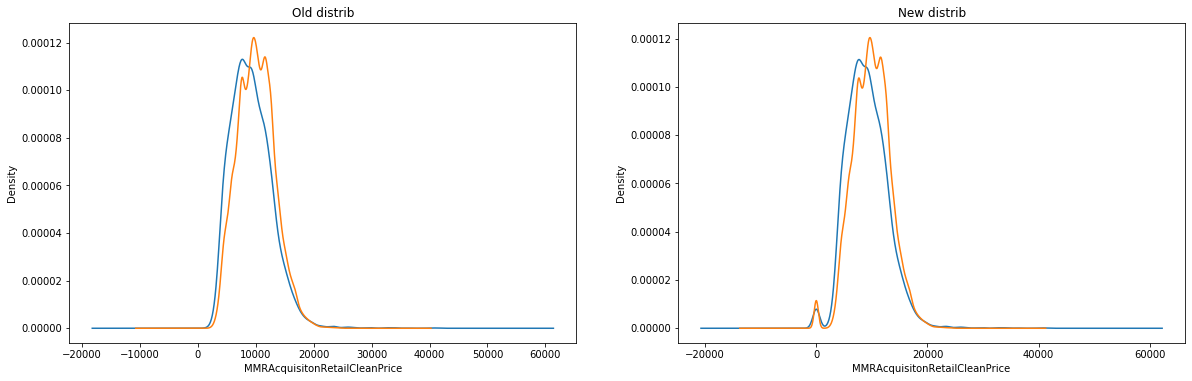

In [131]:
Variable='MMRAcquisitonRetailCleanPrice'

#Modifica a pre per rendere equiparabili i grafici
pre[Variable].replace(0, np.nan, inplace=True)

# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0), title='Old distrib', xlabel=Variable)
for IsBadBuy_Class in pre['IsBadBuy'].unique():
    pre[Variable][pre.IsBadBuy == IsBadBuy_Class].plot(kind='kde')

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1), title='New distrib', xlabel=Variable)
for IsBadBuy_Class in post['IsBadBuy'].unique():
    post[Variable][post.IsBadBuy == IsBadBuy_Class].plot(kind='kde')

plt.show()

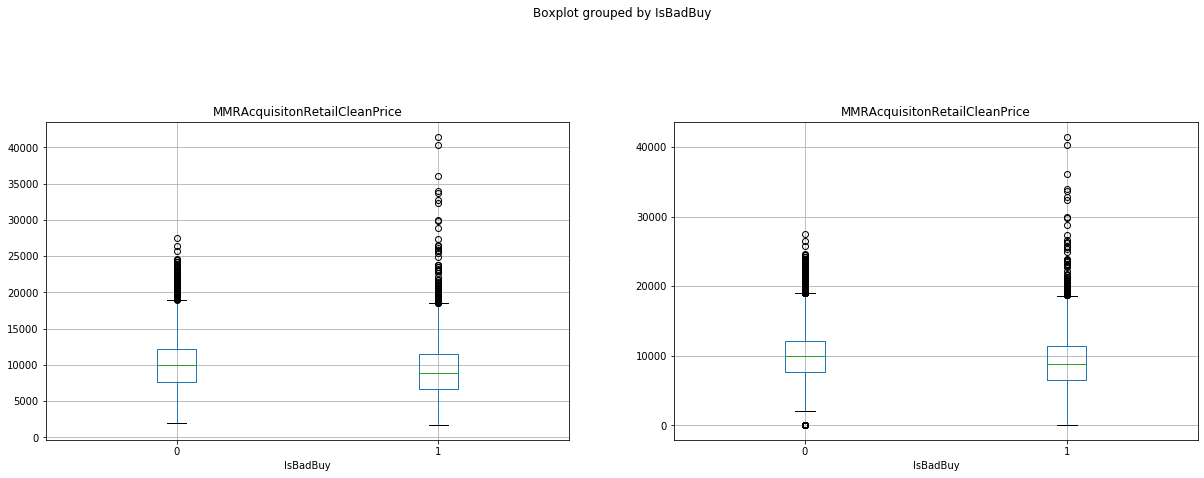

In [127]:
# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

# Plot old Distribution
ax1=plt.subplot2grid(fig_dims, (0, 0), title='Old distrib')
pre.boxplot(column=[Variable], by='IsBadBuy', ax=ax1)

# Plot new Distribution
ax2=plt.subplot2grid(fig_dims, (0, 1), title='New distrib')
post.boxplot(column=[Variable], by='IsBadBuy', ax=ax2)

plt.show()

# MMRCurrentAuctionAveragePrice

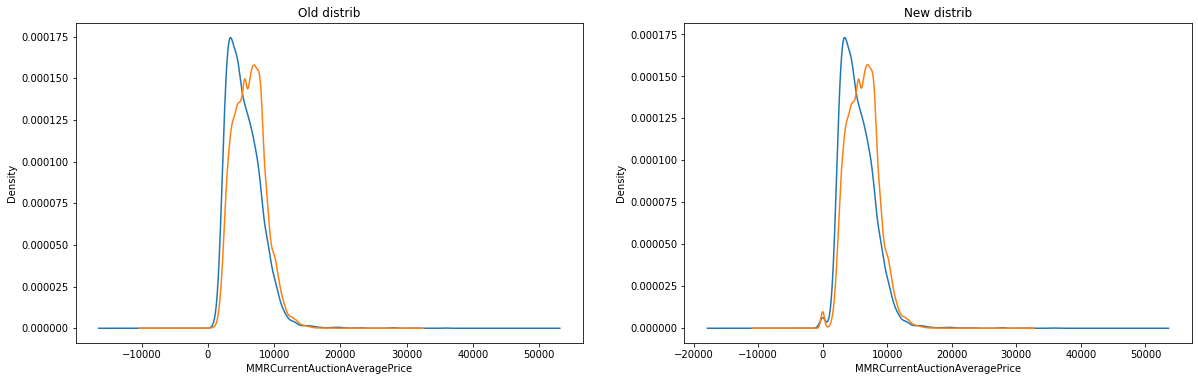

In [132]:
Variable='MMRCurrentAuctionAveragePrice'

#Modifica a pre per rendere equiparabili i grafici
pre[Variable].replace(0, np.nan, inplace=True)

# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0), title='Old distrib', xlabel=Variable)
for IsBadBuy_Class in pre['IsBadBuy'].unique():
    pre[Variable][pre.IsBadBuy == IsBadBuy_Class].plot(kind='kde')

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1), title='New distrib', xlabel=Variable)
for IsBadBuy_Class in post['IsBadBuy'].unique():
    post[Variable][post.IsBadBuy == IsBadBuy_Class].plot(kind='kde')

plt.show()

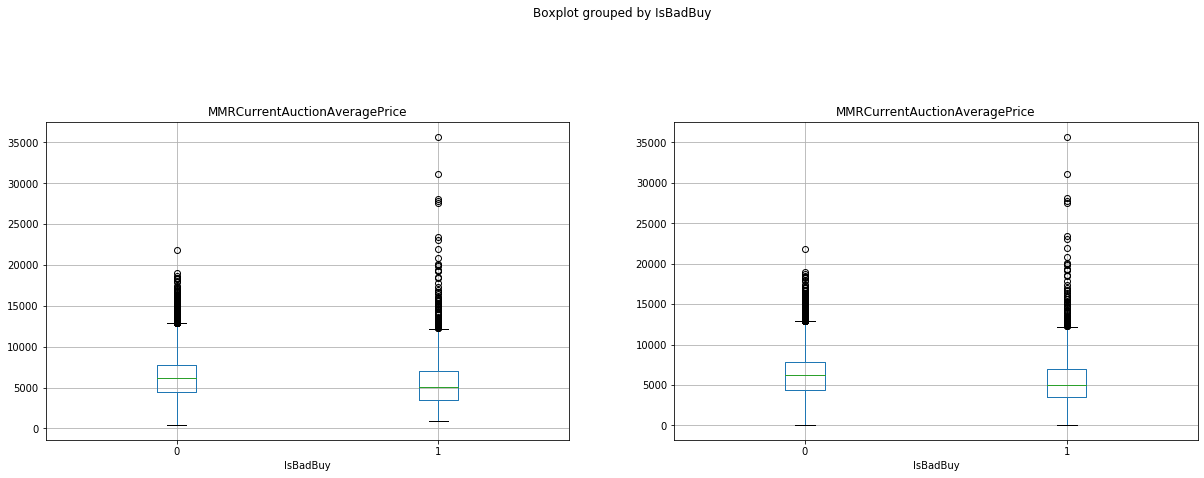

In [129]:
# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

# Plot old Distribution
ax1=plt.subplot2grid(fig_dims, (0, 0), title='Old distrib')
pre.boxplot(column=[Variable], by='IsBadBuy', ax=ax1)

# Plot new Distribution
ax2=plt.subplot2grid(fig_dims, (0, 1), title='New distrib')
post.boxplot(column=[Variable], by='IsBadBuy', ax=ax2)

plt.show()

# MMRCurrentAuctionCleanPrice

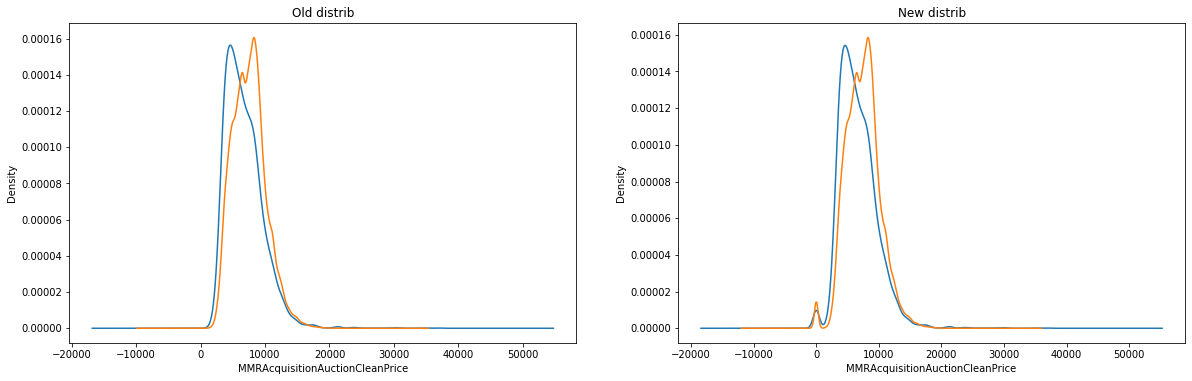

In [134]:
Variable='MMRCurrentAuctionCleanPrice'

#Modifica a pre per rendere equiparabili i grafici
pre[Variable].replace(0, np.nan, inplace=True)
pre[Variable].replace(1, np.nan, inplace=True)

# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0), title='Old distrib', xlabel=Variable)
for IsBadBuy_Class in pre['IsBadBuy'].unique():
    pre[Variable][pre.IsBadBuy == IsBadBuy_Class].plot(kind='kde')

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1), title='New distrib', xlabel=Variable)
for IsBadBuy_Class in post['IsBadBuy'].unique():
    post[Variable][post.IsBadBuy == IsBadBuy_Class].plot(kind='kde')

plt.show()

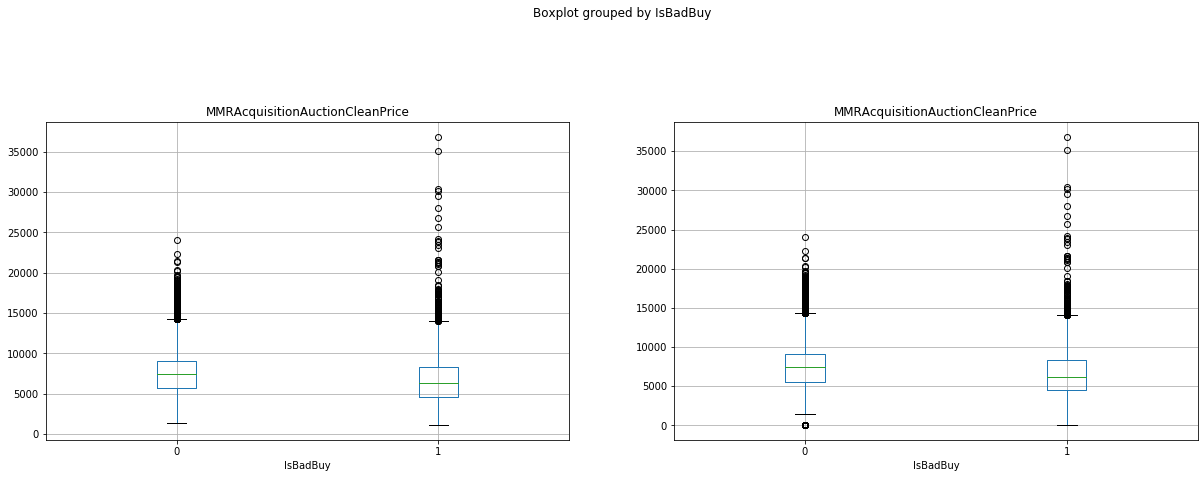

In [135]:
# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

# Plot old Distribution
ax1=plt.subplot2grid(fig_dims, (0, 0), title='Old distrib')
pre.boxplot(column=[Variable], by='IsBadBuy', ax=ax1)

# Plot new Distribution
ax2=plt.subplot2grid(fig_dims, (0, 1), title='New distrib')
post.boxplot(column=[Variable], by='IsBadBuy', ax=ax2)

plt.show()

# MMRCurrentRetailAveragePrice

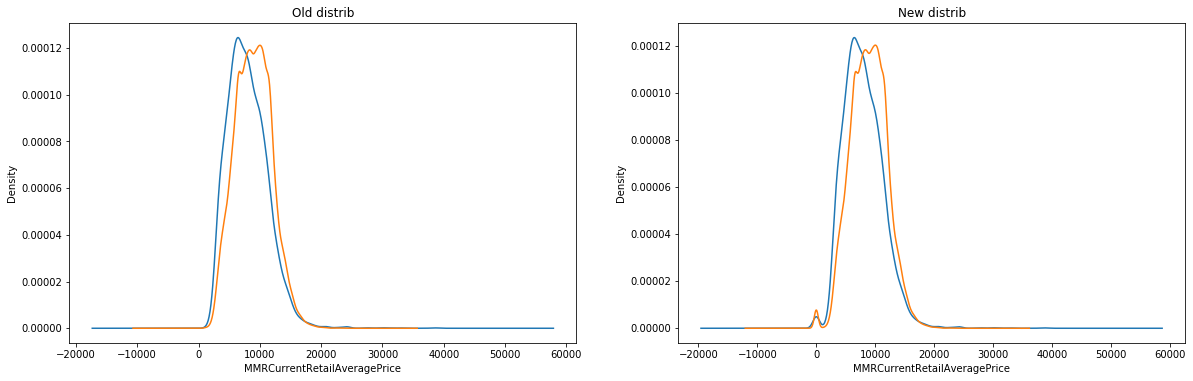

In [138]:
Variable='MMRCurrentRetailAveragePrice'

#Modifica a pre per rendere equiparabili i grafici
pre[Variable].replace(0, np.nan, inplace=True)

# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0), title='Old distrib', xlabel=Variable)
for IsBadBuy_Class in pre['IsBadBuy'].unique():
    pre[Variable][pre.IsBadBuy == IsBadBuy_Class].plot(kind='kde')

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1), title='New distrib', xlabel=Variable)
for IsBadBuy_Class in post['IsBadBuy'].unique():
    post[Variable][post.IsBadBuy == IsBadBuy_Class].plot(kind='kde')

plt.show()

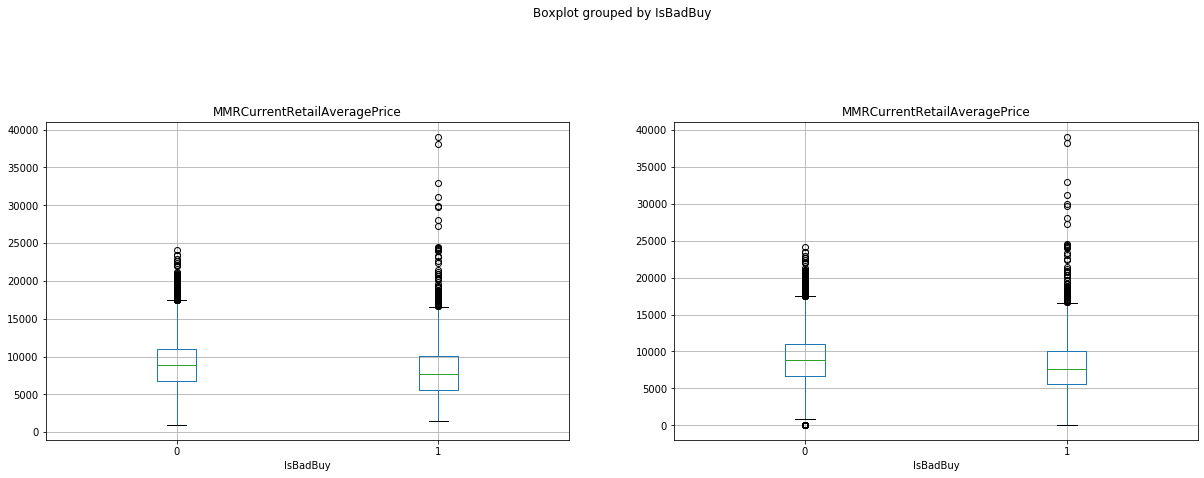

In [137]:
# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

# Plot old Distribution
ax1=plt.subplot2grid(fig_dims, (0, 0), title='Old distrib')
pre.boxplot(column=[Variable], by='IsBadBuy', ax=ax1)

# Plot new Distribution
ax2=plt.subplot2grid(fig_dims, (0, 1), title='New distrib')
post.boxplot(column=[Variable], by='IsBadBuy', ax=ax2)

plt.show()

# MMRCurrentRetailCleanPrice

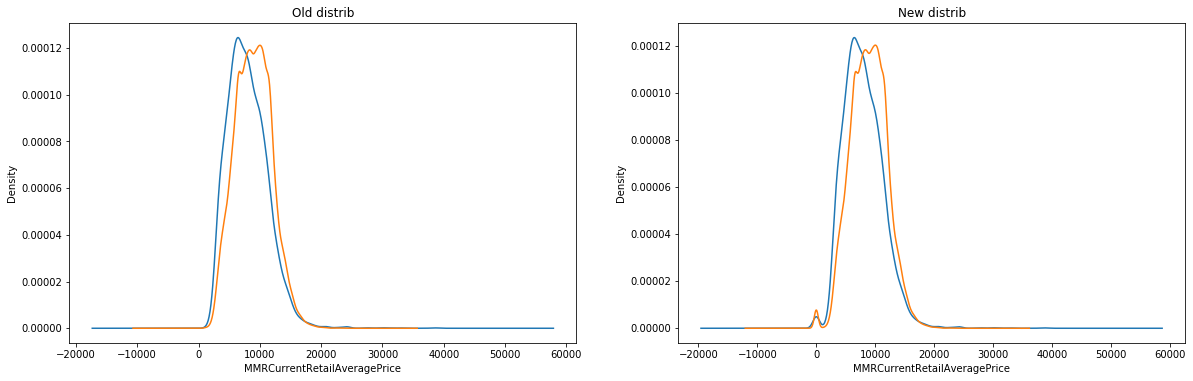

In [139]:
Variable='MMRCurrentRetailCleanPrice'

#Modifica a pre per rendere equiparabili i grafici
pre[Variable].replace(0, np.nan, inplace=True)

# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0), title='Old distrib', xlabel=Variable)
for IsBadBuy_Class in pre['IsBadBuy'].unique():
    pre[Variable][pre.IsBadBuy == IsBadBuy_Class].plot(kind='kde')

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1), title='New distrib', xlabel=Variable)
for IsBadBuy_Class in post['IsBadBuy'].unique():
    post[Variable][post.IsBadBuy == IsBadBuy_Class].plot(kind='kde')

plt.show()

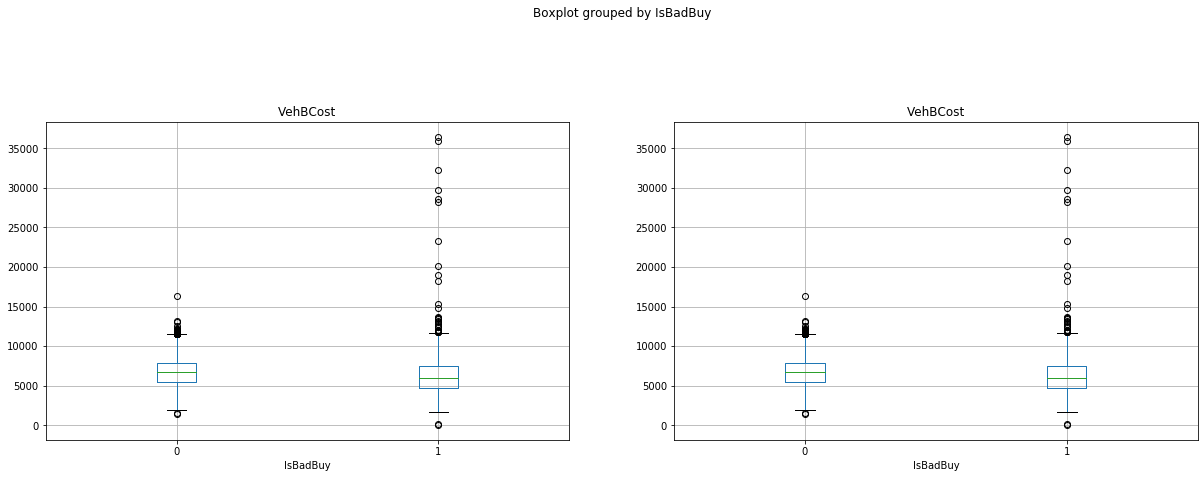

In [18]:
# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

# Plot old Distribution
ax1=plt.subplot2grid(fig_dims, (0, 0), title='Old distrib')
pre.boxplot(column=[Variable], by='IsBadBuy', ax=ax1)

# Plot new Distribution
ax2=plt.subplot2grid(fig_dims, (0, 1), title='New distrib')
post.boxplot(column=[Variable], by='IsBadBuy', ax=ax2)

plt.show()

# VehOdo

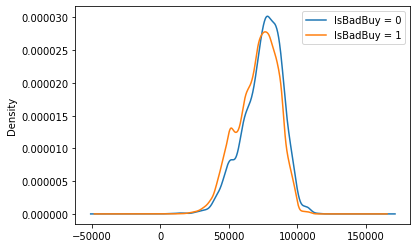

In [7]:
Variable='VehOdo'

for IsBadBuy_Class in pre['IsBadBuy'].unique():
    pre[Variable][pre.IsBadBuy == IsBadBuy_Class].plot(kind='kde')
    
plt.legend(('IsBadBuy = 0', 'IsBadBuy = 1'), loc='best')
    
plt.show()

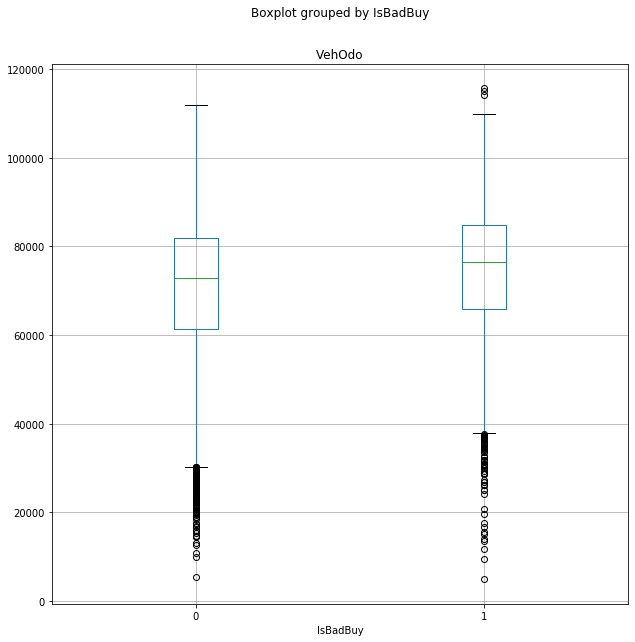

In [14]:
pre.boxplot(column=[Variable], by='IsBadBuy', figsize=(10,10))
plt.show()

# VehBCost

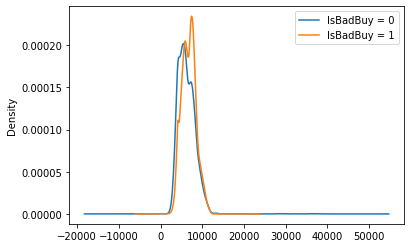

In [16]:
Variable='VehBCost'

for IsBadBuy_Class in pre['IsBadBuy'].unique():
    pre[Variable][pre.IsBadBuy == IsBadBuy_Class].plot(kind='kde')
    
plt.legend(('IsBadBuy = 0', 'IsBadBuy = 1'), loc='best')
    
plt.show()

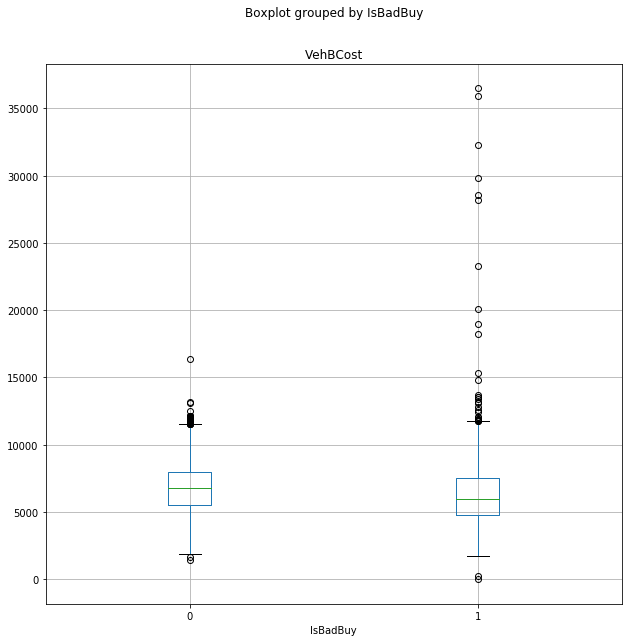

In [17]:
pre.boxplot(column=[Variable], by='IsBadBuy', figsize=(10,10))
plt.show()

# WarrantyCost

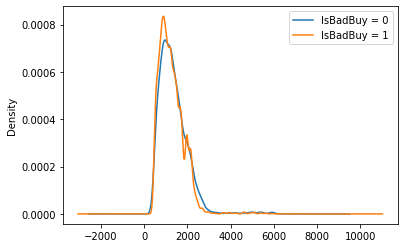

In [20]:
Variable='WarrantyCost'

for IsBadBuy_Class in pre['IsBadBuy'].unique():
    pre[Variable][pre.IsBadBuy == IsBadBuy_Class].plot(kind='kde')
    
plt.legend(('IsBadBuy = 0', 'IsBadBuy = 1'), loc='best')
    
plt.show()

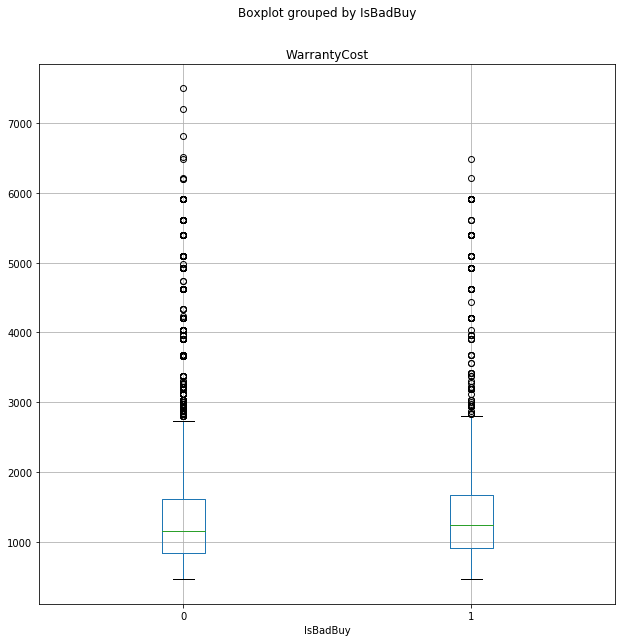

In [21]:
pre.boxplot(column=[Variable], by='IsBadBuy', figsize=(10,10))
plt.show()